In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.DataFrame()
for i in range(1,13):
    if i < 10:
        temp_df = pd.read_csv(f"DATA/JC-20200{i}-citibike-tripdata.csv")
    else:
        temp_df = pd.read_csv(f"DATA/JC-2020{i}-citibike-tripdata.csv")
    df = df.append(temp_df)

df = df.reset_index()
df = df.sample(frac=1)
#df.drop(['Start Station Name', 'End Station Name'], axis=1, inplace=True)
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
96424,20455,628,2020-05-28 13:08:45.0780,2020-05-28 13:19:13.3770,3198,Heights Elevator,40.748716,-74.040443,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,41811,Customer,1995,1
121285,20239,567,2020-06-18 14:06:01.3290,2020-06-18 14:15:29.1590,3267,Morris Canal,40.712419,-74.038526,3187,Warren St,40.721124,-74.038051,42564,Subscriber,1989,1
153150,15183,1676,2020-07-13 18:50:37.3090,2020-07-13 19:18:34.1770,3202,Newport PATH,40.727224,-74.033759,3202,Newport PATH,40.727224,-74.033759,25721,Customer,1969,0
17513,17513,288,2020-01-22 14:34:56.7850,2020-01-22 14:39:45.3730,3194,McGinley Square,40.725340,-74.067622,3640,Journal Square,40.733670,-74.062500,29294,Subscriber,1981,1
200504,23857,359,2020-08-18 10:59:43.9410,2020-08-18 11:05:43.7040,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,40.728745,-74.032108,33887,Subscriber,1980,1


In [3]:
len(df)

336802

In [4]:
label_encoder = preprocessing.LabelEncoder()

In [5]:
df['usertype']= label_encoder.fit_transform(df['usertype'])

In [6]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
96424,20455,628,2020-05-28 13:08:45.0780,2020-05-28 13:19:13.3770,3198,Heights Elevator,40.748716,-74.040443,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,41811,0,1995,1
121285,20239,567,2020-06-18 14:06:01.3290,2020-06-18 14:15:29.1590,3267,Morris Canal,40.712419,-74.038526,3187,Warren St,40.721124,-74.038051,42564,1,1989,1
153150,15183,1676,2020-07-13 18:50:37.3090,2020-07-13 19:18:34.1770,3202,Newport PATH,40.727224,-74.033759,3202,Newport PATH,40.727224,-74.033759,25721,0,1969,0
17513,17513,288,2020-01-22 14:34:56.7850,2020-01-22 14:39:45.3730,3194,McGinley Square,40.725340,-74.067622,3640,Journal Square,40.733670,-74.062500,29294,1,1981,1
200504,23857,359,2020-08-18 10:59:43.9410,2020-08-18 11:05:43.7040,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,40.728745,-74.032108,33887,1,1980,1


In [7]:
df['birth year'].isna().unique()

array([False])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


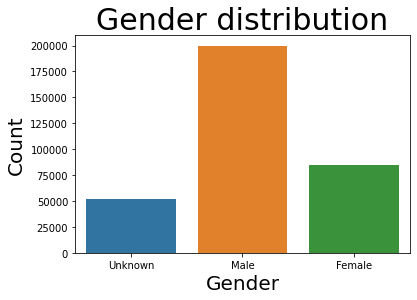

In [9]:
splot = sns.countplot('gender', data=df)
splot.axes.set_title("Gender distribution",fontsize=30)
splot.axes.set_xlabel("Gender",fontsize=20)
splot.axes.set_ylabel("Count",fontsize=20)
splot.axes.set_xticklabels(['Unknown', 'Male', 'Female'])
plt.show()

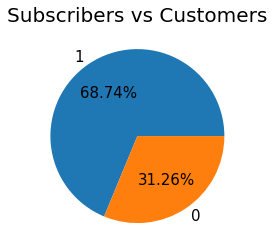

In [10]:
user_type_count = df['usertype'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%', textprops={'fontsize': 15} )
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

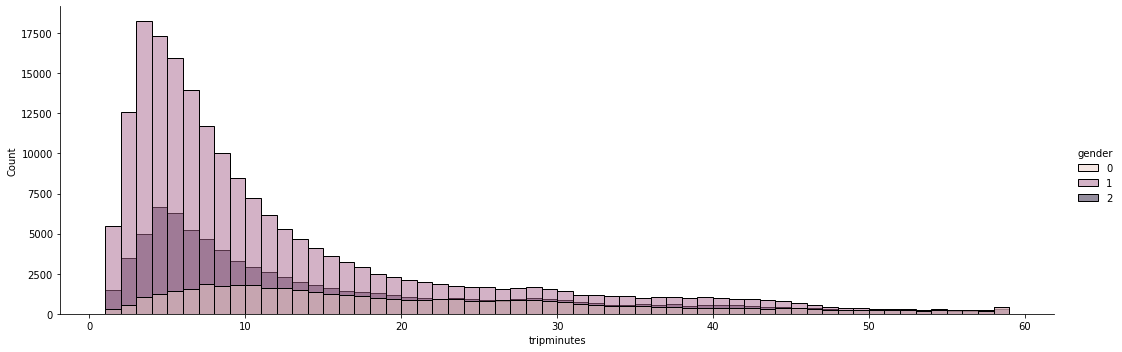

In [11]:
df['tripminutes'] = df['tripduration'] // 60
sns.displot(data=df,x="tripminutes", bins=range(1,60), aspect=15/5, hue = "gender");
#sns.displot(data=df,x="tripminutes", hue = "gender",kind="kde",bins=range(1,61));

In [12]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripminutes
96424,20455,628,2020-05-28 13:08:45.0780,2020-05-28 13:19:13.3770,3198,Heights Elevator,40.748716,-74.040443,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,41811,0,1995,1,10
121285,20239,567,2020-06-18 14:06:01.3290,2020-06-18 14:15:29.1590,3267,Morris Canal,40.712419,-74.038526,3187,Warren St,40.721124,-74.038051,42564,1,1989,1,9
153150,15183,1676,2020-07-13 18:50:37.3090,2020-07-13 19:18:34.1770,3202,Newport PATH,40.727224,-74.033759,3202,Newport PATH,40.727224,-74.033759,25721,0,1969,0,27
17513,17513,288,2020-01-22 14:34:56.7850,2020-01-22 14:39:45.3730,3194,McGinley Square,40.725340,-74.067622,3640,Journal Square,40.733670,-74.062500,29294,1,1981,1,4
200504,23857,359,2020-08-18 10:59:43.9410,2020-08-18 11:05:43.7040,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,40.728745,-74.032108,33887,1,1980,1,5


In [13]:
df["start station name"].value_counts()

Grove St PATH                 22930
Newport Pkwy                  19844
Liberty Light Rail            16933
Hamilton Park                 14718
Sip Ave                       13663
Marin Light Rail              13615
Newport PATH                  12855
Harborside                    12757
Columbus Dr at Exchange Pl    12586
JC Medical Center             10795
City Hall                      9715
Morris Canal                   9209
Warren St                      9177
Washington St                  8855
Paulus Hook                    8069
Newark Ave                     7872
Van Vorst Park                 7301
Columbus Drive                 7285
Jersey & 3rd                   6075
McGinley Square                5732
Brunswick St                   5485
Brunswick & 6th                5483
Jersey & 6th St                5388
Manila & 1st                   5346
Lincoln Park                   5339
Grand St                       5165
Baldwin at Montgomery          4865
Dixon Mills                 

In [14]:
df['month'] = pd.DatetimeIndex(df['starttime']).month

In [15]:
gk = df.groupby('month')
print(gk["start station name"].value_counts().to_string())

month  start station name        
1      Grove St PATH                 3100
       Sip Ave                       1493
       Hamilton Park                 1327
       Columbus Dr at Exchange Pl    1152
       Harborside                    1091
       Newport PATH                   989
       Marin Light Rail               904
       Brunswick & 6th                776
       City Hall                      745
       Newark Ave                     720
       Newport Pkwy                   641
       Manila & 1st                   632
       Warren St                      628
       Jersey & 3rd                   616
       Monmouth and 6th               613
       Jersey & 6th St                584
       Washington St                  575
       Columbus Drive                 556
       Morris Canal                   542
       McGinley Square                538
       Brunswick St                   529
       Van Vorst Park                 528
       Dixon Mills                    511


In [16]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripminutes,month
96424,20455,628,2020-05-28 13:08:45.0780,2020-05-28 13:19:13.3770,3198,Heights Elevator,40.748716,-74.040443,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,41811,0,1995,1,10,5
121285,20239,567,2020-06-18 14:06:01.3290,2020-06-18 14:15:29.1590,3267,Morris Canal,40.712419,-74.038526,3187,Warren St,40.721124,-74.038051,42564,1,1989,1,9,6
153150,15183,1676,2020-07-13 18:50:37.3090,2020-07-13 19:18:34.1770,3202,Newport PATH,40.727224,-74.033759,3202,Newport PATH,40.727224,-74.033759,25721,0,1969,0,27,7
17513,17513,288,2020-01-22 14:34:56.7850,2020-01-22 14:39:45.3730,3194,McGinley Square,40.725340,-74.067622,3640,Journal Square,40.733670,-74.062500,29294,1,1981,1,4,1
200504,23857,359,2020-08-18 10:59:43.9410,2020-08-18 11:05:43.7040,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,40.728745,-74.032108,33887,1,1980,1,5,8


In [17]:
'''
Get hour of the day during which trip was made and store in separate column - will be used for getting clusters
'''
df['hour of day'] = pd.DatetimeIndex(df['starttime']).hour

In [18]:
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripminutes,month,hour of day
96424,20455,628,2020-05-28 13:08:45.0780,2020-05-28 13:19:13.3770,3198,Heights Elevator,40.748716,-74.040443,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,41811,0,1995,1,10,5,13
121285,20239,567,2020-06-18 14:06:01.3290,2020-06-18 14:15:29.1590,3267,Morris Canal,40.712419,-74.038526,3187,Warren St,40.721124,-74.038051,42564,1,1989,1,9,6,14
153150,15183,1676,2020-07-13 18:50:37.3090,2020-07-13 19:18:34.1770,3202,Newport PATH,40.727224,-74.033759,3202,Newport PATH,40.727224,-74.033759,25721,0,1969,0,27,7,18
17513,17513,288,2020-01-22 14:34:56.7850,2020-01-22 14:39:45.3730,3194,McGinley Square,40.725340,-74.067622,3640,Journal Square,40.733670,-74.062500,29294,1,1981,1,4,1,14
200504,23857,359,2020-08-18 10:59:43.9410,2020-08-18 11:05:43.7040,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,40.728745,-74.032108,33887,1,1980,1,5,8,10


In [19]:
'''
0:00-5:59hrs - 1
6:00-11:59hrs - 2
12:00-17:59 - 3
18:00-23:59 - 4

Day has been divided into 4 parts based on the hours at which the trips
are being made
'''

hour_cluster = []
hours = df['hour of day'].values.tolist()

for entry in hours:
    if(entry >= 0 and entry < 6):
        hour_cluster += [1]
    elif(entry >= 6 and entry < 12):
        hour_cluster += [2]
    elif(entry >= 12 and entry < 18):
        hour_cluster += [3]
    elif(entry >= 18 and entry < 24):
        hour_cluster += [4]
        
df['hour of day cluster'] = hour_cluster
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripminutes,month,hour of day,hour of day cluster
96424,20455,628,2020-05-28 13:08:45.0780,2020-05-28 13:19:13.3770,3198,Heights Elevator,40.748716,-74.040443,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,41811,0,1995,1,10,5,13,3
121285,20239,567,2020-06-18 14:06:01.3290,2020-06-18 14:15:29.1590,3267,Morris Canal,40.712419,-74.038526,3187,Warren St,40.721124,-74.038051,42564,1,1989,1,9,6,14,3
153150,15183,1676,2020-07-13 18:50:37.3090,2020-07-13 19:18:34.1770,3202,Newport PATH,40.727224,-74.033759,3202,Newport PATH,40.727224,-74.033759,25721,0,1969,0,27,7,18,4
17513,17513,288,2020-01-22 14:34:56.7850,2020-01-22 14:39:45.3730,3194,McGinley Square,40.725340,-74.067622,3640,Journal Square,40.733670,-74.062500,29294,1,1981,1,4,1,14,3
200504,23857,359,2020-08-18 10:59:43.9410,2020-08-18 11:05:43.7040,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,40.728745,-74.032108,33887,1,1980,1,5,8,10,2


In [107]:
'''
Analyzing data based on time to see how long people are generally
interested to drive on bikes
'''

avg_tripmins = df['tripminutes'].mean()
max_tripmins = df['tripminutes'].max()
min_tripmins = df['tripminutes'].min()

df['trip_above_15'] = np.where(df['tripminutes']>15,1,0)
df['trip_above_30'] = np.where(df['tripminutes']>30,1,0)
df['trip_above_60'] = np.where(df['tripminutes']>60,1,0)

df['trip_above_60'].value_counts()

0    317333
1     19469
Name: trip_above_60, dtype: int64

<AxesSubplot:xlabel='start station name'>

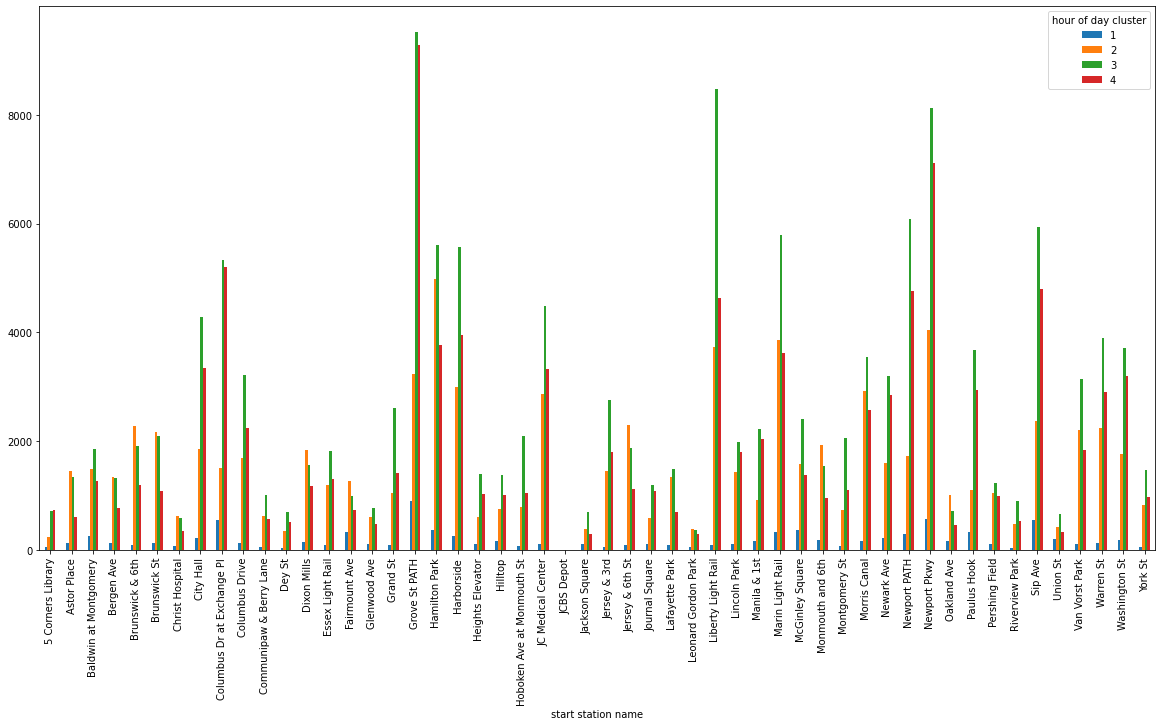

In [88]:
'''
Data grouped based on hour of day clusters(1,2,3,4) and then plotted based on start station
'''

plt.rcParams['figure.figsize'] = [20, 10]

ghodc = df.groupby(['hour of day cluster'])#['hour of day cluster','start station name']
#print(ghodc.value_counts())
ghodc["start station name"].value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='end station name'>

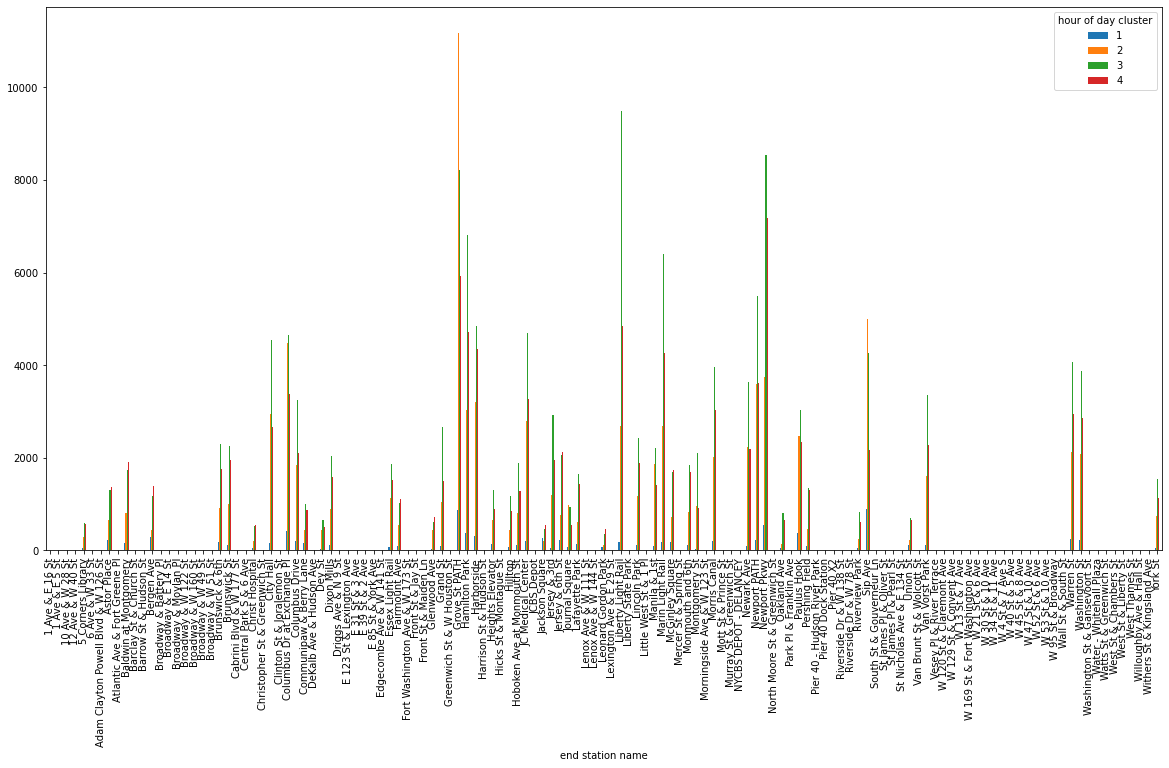

In [136]:
'''
Data grouped based on hour of day clusters(1,2,3,4) and then plotted based on end station

Interesting note post analysis - data from end station for main hubs(places with peaks in start & end stations)
coincides well. That is - look at Grove St Park. In the 2nd hour cluster, they are have they are the most sought after
end station while in cluster 3, looking at graph above, we can see that Grove St. Park is the most sought after start
station. Some hubs coincide this way which is great. Our task could be to identify those hubs that don't as it could
give more information on where to bifurcate these resources.

Also, numerical calcs could be done - like at Grove St James, in cluster 2 end stations upwards of 11k bikes are there.
However, incase of demand, only upwards of 9k bikes are being used. In a way, that's like 2k bikes going stagnant.

IMPORTANT POINT TO NOTE:
Analysis being done is on whole dataset, i.e. over 12 months. Microscoping analysis could provide more information
'''

ghodc = df.groupby(['hour of day cluster'])#['hour of day cluster','start station name']
#print(ghodc.value_counts())
ghodc["end station name"].value_counts().unstack(0).plot.bar()

<AxesSubplot:xlabel='hour of day cluster'>

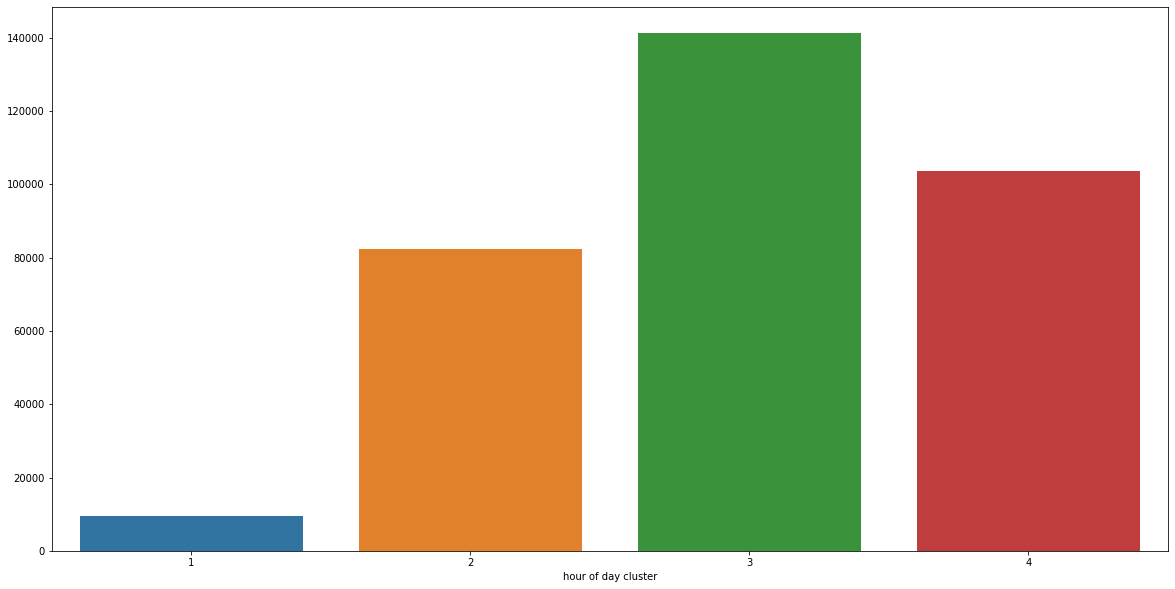

In [137]:
import seaborn as sns

'''
plot to see which are the peak hours in a day
'''

ghodc_size = ghodc.size()

sns.barplot(x = ghodc_size.index, y = ghodc_size.values)

In [123]:
import math

'''
Getting distance in miles and then storing in dataframe for further analysis
'''

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return round(d*0.621371,2)

start_lat = df['start station latitude'].values.tolist()
start_long = df['start station longitude'].values.tolist()
end_lat = df['end station latitude'].values.tolist()
end_long = df['end station longitude'].values.tolist()

distances = []
for i in range(0, len(start_lat)):
    distances += [distance((start_lat[i], start_long[i]), (end_lat[i], end_long[i]))]

df['distance'] = distances
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,birth year,gender,tripminutes,month,hour of day,hour of day cluster,trip_above_30,trip_above_15,trip_above_60,distance
96424,20455,628,2020-05-28 13:08:45.0780,2020-05-28 13:19:13.3770,3198,Heights Elevator,40.748716,-74.040443,3791,Hoboken Ave at Monmouth St,...,1995,1,10,5,13,3,0,0,0,0.99
121285,20239,567,2020-06-18 14:06:01.3290,2020-06-18 14:15:29.1590,3267,Morris Canal,40.712419,-74.038526,3187,Warren St,...,1989,1,9,6,14,3,0,0,0,0.60
153150,15183,1676,2020-07-13 18:50:37.3090,2020-07-13 19:18:34.1770,3202,Newport PATH,40.727224,-74.033759,3202,Newport PATH,...,1969,0,27,7,18,4,0,1,0,0.00
17513,17513,288,2020-01-22 14:34:56.7850,2020-01-22 14:39:45.3730,3194,McGinley Square,40.725340,-74.067622,3640,Journal Square,...,1981,1,4,1,14,3,0,0,0,0.63
200504,23857,359,2020-08-18 10:59:43.9410,2020-08-18 11:05:43.7040,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,...,1980,1,5,8,10,2,0,0,0,0.80


In [134]:
avg_dist = df['distance'].mean()
max_dist = df['distance'].max()
min_dist = df['distance'].min()

avg_dist, max_dist, min_dist

(0.6616456553108355, 5389.2, 0.0)